In [1]:
import os
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.metrics
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

def calc_mean_binary_cross_entropy_from_probas(ytrue_N, yproba_N):
    return sklearn.metrics.log_loss(ytrue_N, yproba_N, labels=[0, 1]) / np.log(2.0)



   

In [2]:
DATA_DIR = os.path.join('.', 'data_digits_8_vs_9_noisy')

x_tr_A = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
x_va_B = np.loadtxt(os.path.join(DATA_DIR, 'x_valid.csv'), delimiter=',', skiprows=1)
x_te_B = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)

y_tr_A = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)
y_va_B = np.loadtxt(os.path.join(DATA_DIR, 'y_valid.csv'), delimiter=',', skiprows=1)

A = x_tr_A.shape[0]
B = x_va_B.shape[0]

In [6]:
tr_positive_count = 0
for y in y_tr_A:
    if y == 1:
        tr_positive_count += 1
tr_pos_frac = tr_positive_count/A
print(A,tr_positive_count,tr_pos_frac)

va_positive_count = 0
for y in y_va_B:
    if y == 1:
        va_positive_count += 1
va_pos_frac = va_positive_count/B
print(B,va_positive_count,va_pos_frac)

9817 4913 0.500458388509728
1983 1036 0.5224407463439233


In [8]:
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()
C = 1e6
for i in range(1, 41):
    lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i).fit(x_tr_A, y_tr_A)
    yproba_tr_A = lr.predict_proba(x_tr_A)[:, 1]
    yproba_va_B = lr.predict_proba(x_va_B)[:, 1]

    tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr_A, yproba_tr_A)
    va_bce = calc_mean_binary_cross_entropy_from_probas(y_va_B, yproba_va_B)
    tr_bce_list.append(tr_bce)
    va_bce_list.append(va_bce)

    tr_error = sklearn.metrics.zero_one_loss(y_tr_A, yproba_tr_A >= 0.5)
    va_error = sklearn.metrics.zero_one_loss(y_va_B, yproba_va_B >= 0.5)
    tr_err_list.append(tr_error)
    va_err_list.append(va_error)


/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

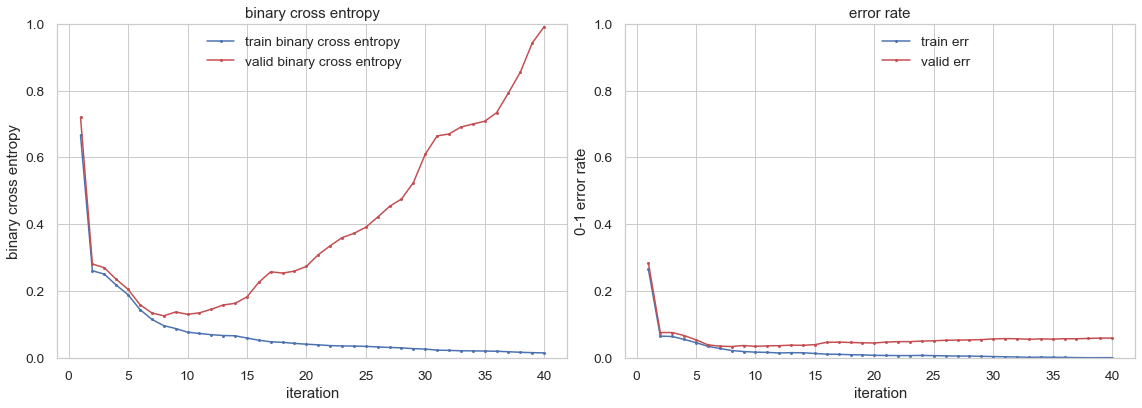

In [11]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('binary cross entropy')
plt.plot(range(1, 41), tr_bce_list, 'b.-', label='train binary cross entropy')
plt.plot(range(1, 41), va_bce_list, 'r.-', label='valid binary cross entropy')
plt.ylabel('binary cross entropy')
plt.xlabel("iteration")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('error rate')
plt.plot(range(1, 41), tr_err_list, 'b.-', label='train err')
plt.plot(range(1, 41), va_err_list, 'r.-', label='valid err')
plt.ylabel('0-1 error rate')
plt.xlabel("iteration")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])
plt.savefig('figure1b.jpeg')


In [14]:
tr_err_list = list()
va_err_list = list()
tr_bce_list = list()
va_bce_list = list()
i = 1000
C_grid = np.logspace(-9, 6, 31)
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i)
    lr.fit(x_tr_A, y_tr_A)
    yproba_tr_A = lr.predict_proba(x_tr_A)[:, 1]
    yproba_va_B = lr.predict_proba(x_va_B)[:, 1]

    tr_bce = calc_mean_binary_cross_entropy_from_probas(y_tr_A, yproba_tr_A)
    va_bce = calc_mean_binary_cross_entropy_from_probas(y_va_B, yproba_va_B)
    tr_bce_list.append(tr_bce)
    va_bce_list.append(va_bce)

    tr_error = sklearn.metrics.zero_one_loss(y_tr_A, yproba_tr_A >= 0.5)
    va_error = sklearn.metrics.zero_one_loss(y_va_B, yproba_va_B >= 0.5)
    tr_err_list.append(tr_error)
    va_err_list.append(va_error)

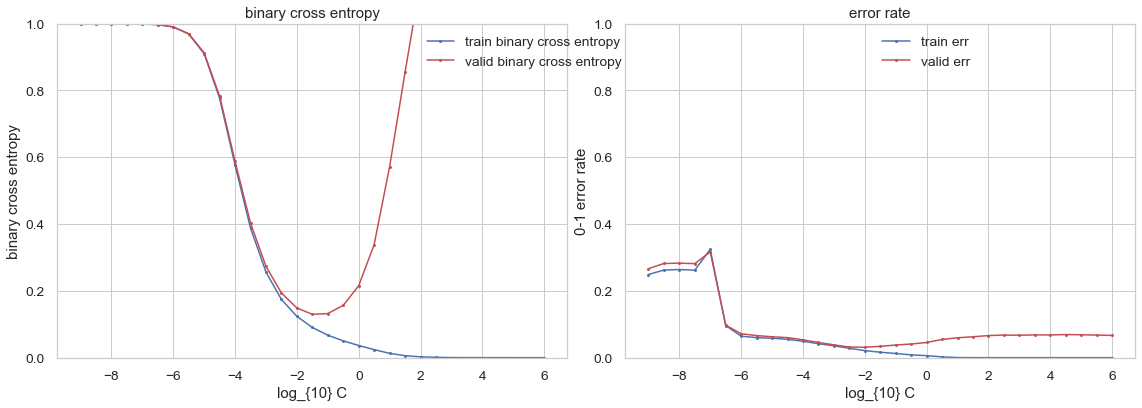

In [15]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('binary cross entropy')
plt.plot(np.log10(C_grid), tr_bce_list, 'b.-', label='train binary cross entropy')
plt.plot(np.log10(C_grid), va_bce_list, 'r.-', label='valid binary cross entropy')
plt.ylabel('binary cross entropy')
plt.xlabel("log_{10} C")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('error rate')
plt.plot(np.log10(C_grid), tr_err_list, 'b.-', label='train err')
plt.plot(np.log10(C_grid), va_err_list, 'r.-', label='valid err')
plt.ylabel('0-1 error rate')
plt.xlabel("log_{10} C")
plt.legend(bbox_to_anchor=(0.7, 1))
plt.ylim([0, 1])
plt.savefig('figure1c.jpeg')

In [17]:
adc = np.power(10,-1.0)
adc

0.1

In [18]:
from confusion_matrix import calc_confusion_matrix_for_probas_and_threshold
from show_images import show_images
C = np.power(10,-1.0)
i = 1000
lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i).fit(x_tr_A, y_tr_A)
yproba_va_B = lr.predict_proba(x_va_B)[:, 1]
false_positive = []
false_negative = []
for i in range(B):
    p = yproba_va_B[i]
    p = p>0.5
    if p == 1 and p != y_va_B[i]:
        false_positive.append(i)
    if p == 0 and p != y_va_B[i]:
        false_negative.append(i)

    



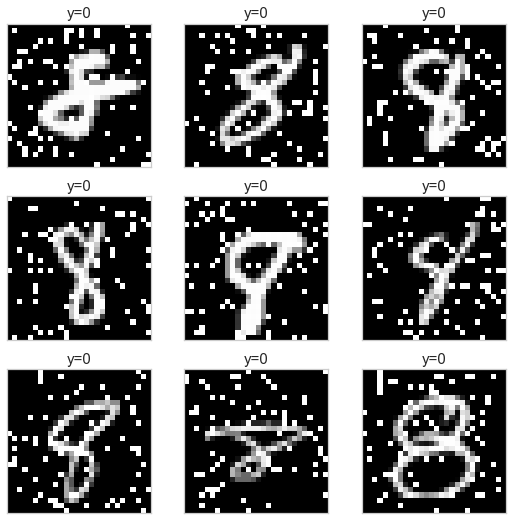

In [24]:
show_images(x_va_B,y_va_B,false_positive[0:9])

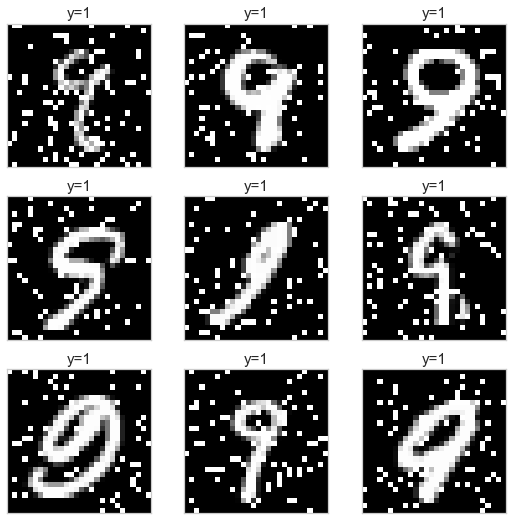

In [20]:
show_images(x_va_B,y_va_B,false_negative[0:9])

In [9]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va_B, yproba_va_B, 0.5))

Predicted    0     1
True                
0          908    39
1           36  1000


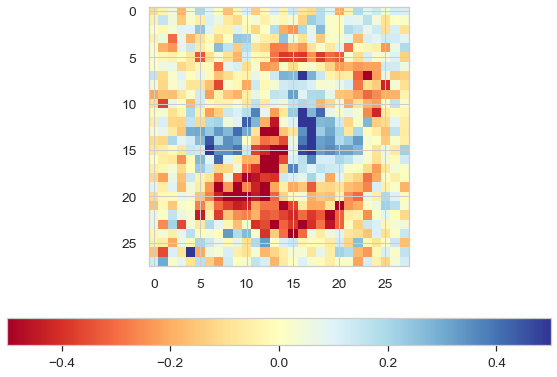

In [10]:
fig, ax = plt.subplots()
weight = lr.coef_
new_weight = weight.reshape(28,28)
im = ax.imshow(new_weight,cmap='RdYlBu', vmin=-0.5, vmax=0.5)
fig.colorbar(im, ax=ax, orientation='horizontal', fraction=.1)
fig.tight_layout()
plt.show()